In [14]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model, model_selection, metrics, pipeline, tree, ensemble, neighbors, svm
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

%matplotlib inline

plt.rcParams["figure.figsize"] = (12, 8)

In [10]:
def load_dataset(path):
    import h5py, numpy as np
    train_dataset = h5py.File(path + 'train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(path + 'test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

X_train, Y_train, X_test, Y_test, classes = load_dataset("/data/handsigns/")
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape, classes

((1080, 64, 64, 3),
 (120, 64, 64, 3),
 (1, 1080),
 (1, 120),
 array([0, 1, 2, 3, 4, 5]))

In [17]:
Y_train.shape

(1, 1080)

In [18]:
y_train = Y_train.flatten()

In [11]:
X_train.shape

(1080, 64, 64, 3)

In [12]:
X_train.reshape((-1, 64 * 64 * 3)).shape

(1080, 12288)

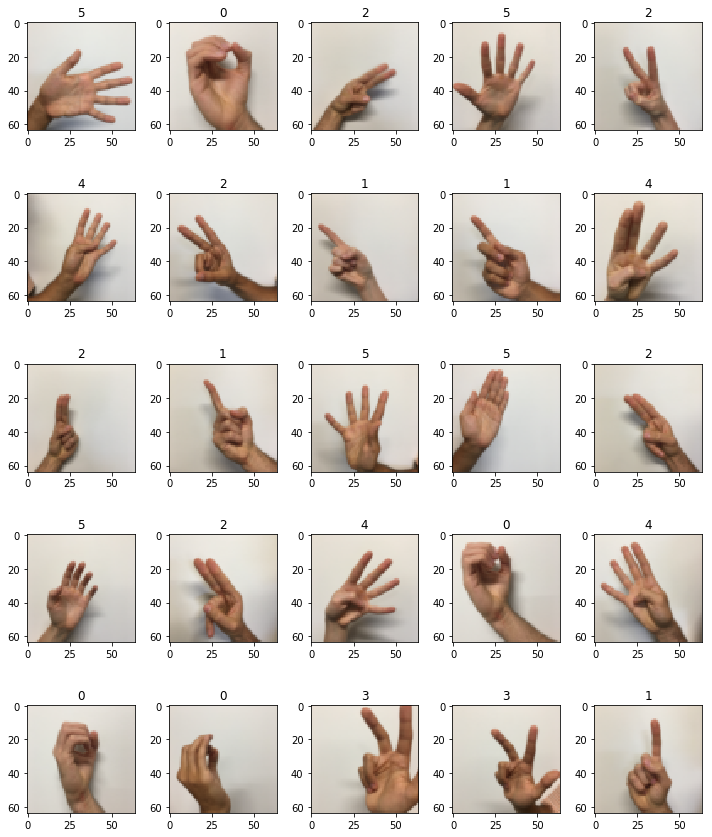

In [21]:
fig, axes = plt.subplots(5, 5, figsize = (10, 12))
for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i])
    ax.set_title(y_train[i])
plt.tight_layout()